In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def setup_dataframe(filename):
    # Read the training dataset
    df = pd.read_csv(filename,low_memory=False)
    print("Training dataset read successfully.")
    # Display dataframe 
    # pd.set_option('display.max_columns', None)
    # df.head()    

    # Add new features to the dataframe 
    # Define user as:
    df['user_'] = df['device_ip'] + df['device_model']
    
    # Hash the result 
    df['user'] = df['user_'].apply(hash) % 10000

    # Add all the anonymous categories and then hash them. 
    df['catgs'] = df['C14'].apply(str) + "_" + df['C15'].apply(str) + "_" + df['C16'].apply(str) + "_" + \
                df['C17'].apply(str) + "_" + df['C18'].apply(str) + "_" + df['C19'].apply(str) + "_" + \
                df['C20'].apply(str) + "_" + df['C21'].apply(str)  + "_" + df['C1'].apply(str) 
    # Define two new features to check whether or not an ad was shown on a mobile app or a desktop website
    df['ad_on_website'] = df['site_id'].apply(lambda s: 0 if s == '85f751fd' else 1)
    df['ad_on_app'] = df['app_id'].apply(lambda s: 0 if s == 'ecad2386' else 1)    


    # Add timeofday
    # Change hour to time of day: Morning, Afternoon, Evening, and Night
    df['hour'] = df['hour'].astype(str)

    # Morning, Afternoon, Evening, Night
    # df['timeofday'] = df['hour'].apply(lambda s: "Morning" if int(s[6:8]) >= 6 and int(s[6:8]) < 12 else "Afternoon" if int(s[6:8]) >=12 and int(s[6:8]) < 18 else "Evening" if int(s[6:8]) >=18 and int(s[6:8]) < 24 else "Night")    
    df['timeofday'] = df['hour'].apply(lambda s: int(s[6:8]))
    
    return df

In [12]:
if __name__ == "__main__":

    filename = "train.zip"
    df = setup_dataframe(filename)


Training dataset read successfully.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 30 columns):
id                  999999 non-null object
click               999999 non-null int64
hour                999999 non-null object
C1                  999999 non-null int64
banner_pos          999999 non-null int64
site_id             999999 non-null object
site_domain         999999 non-null object
site_category       999999 non-null object
app_id              999999 non-null object
app_domain          999999 non-null object
app_category        999999 non-null object
device_id           999999 non-null object
device_ip           999999 non-null object
device_model        999999 non-null object
device_type         999999 non-null int64
device_conn_type    999999 non-null int64
C14                 999999 non-null int64
C15                 999999 non-null int64
C16                 999999 non-null int64
C17                 999999 non-null int64
C18                 999999 non-null in

In [8]:
len(df['device_id'].unique())

83430

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128f640d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ef89790>], dtype=object)

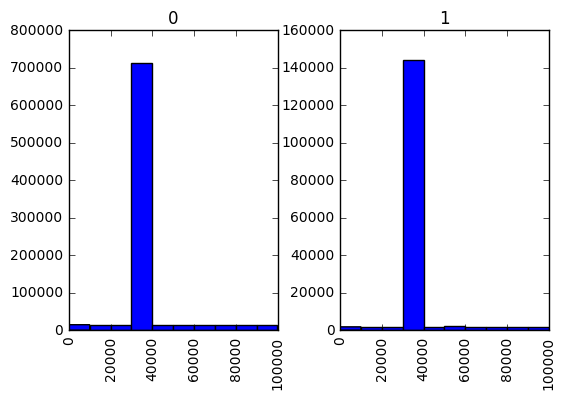

In [9]:
df['device_id_hash'] = df['device_id'].apply(hash) % 100000
df['device_id_hash'].hist(by=df['click'])

In [13]:
len(df['catgs'].unique())

4999

In [16]:
df['catgs'] = df['catgs'].apply(hash) % 500

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13a532550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x169467d10>], dtype=object)

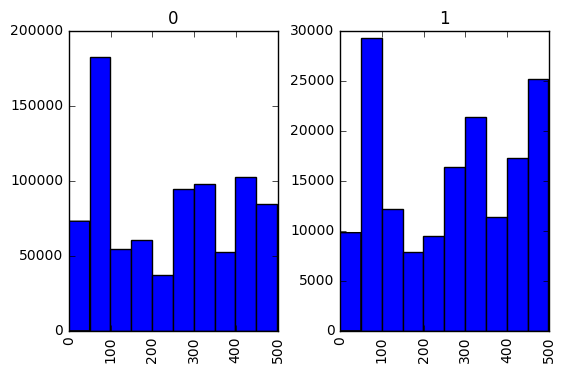

In [17]:
df['catgs'].hist(by=df['click'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1137b8950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x114409c10>], dtype=object)

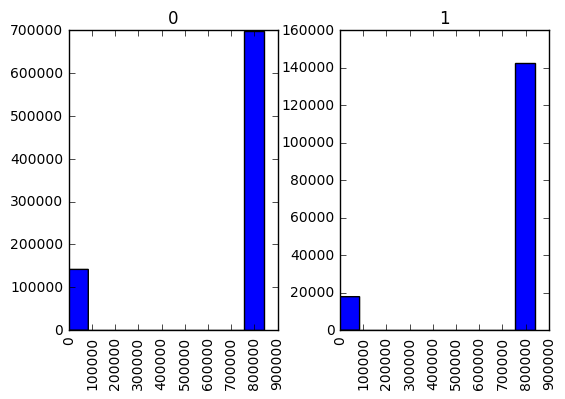

In [20]:
df['device_id_count'] = df.groupby(['device_id'])['device_id'].transform('count')
df['device_id_count'].unique()
df['device_id_count'].hist(by=df['click'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1169b1650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1147fa9d0>], dtype=object)

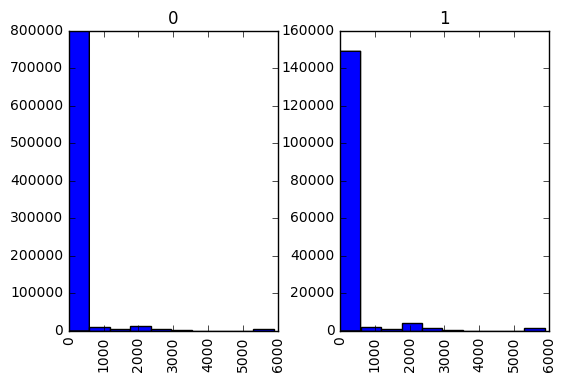

In [46]:
df['device_ip_count'] = df.groupby(['device_ip'])['device_ip'].transform('count')
df['device_ip_count'].unique()
df['device_ip_count'].hist(by=df['click'])

array([840265,   1310,     13,     92,      1,      3,     87,     24,
            2,     19,      7,    113,     14,      5,      6,     10,
           17,      4,     51,      8,     55,     91,    482,    101,
           28,     82,     15,     32,     12,     18,     84,     21,
           75,      9,     16,     64,    267,     57,     33,     94,
           35,     96,     25,     29,    292,     85,     22,     36,
          118,    214,     11,     20,     38,     34,     41,     23,
           54,     45,     99,     26,     30,    104,    115,     70,
           42,    106,     31,     81,    246,     68,     37,     50,
           40,     98,     53,     58,     27,     47,     52,     59,
           60,     63,     65,     67,     49,     46,     88,     66,
           48,    155,     44,     39,    130,    274,    116,     74,
           72,     61,    121,     76,    109,     43,     73,    100,
          135,     97,    117,    119,    108,    133,     56,     71,
      

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12fc84dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x128fbf710>], dtype=object)

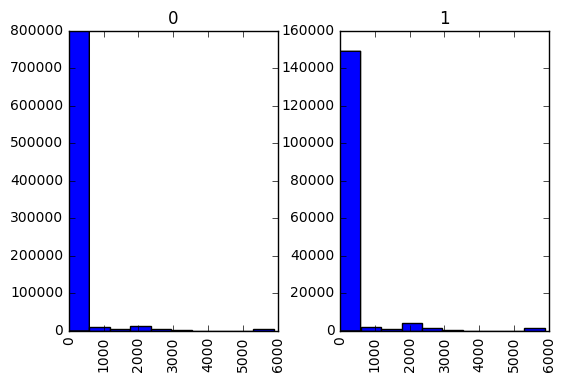

In [22]:
df['device_ip_count'] = df.groupby(['device_ip'])['device_ip'].transform('count')
df['device_ip_count'].hist(by=df['click'])

In [35]:
def set_user_func(row):
    if row['device_id'] == 'a99f214a':
        return row['device_ip'] + row['device_model']
    else:
        return row['device_id']
df['user'] = df.apply(set_user_func, axis=1)

In [39]:
df['user_count'] = df.groupby(['user'])['user'].transform('count')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1148cc7d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c883390>], dtype=object)

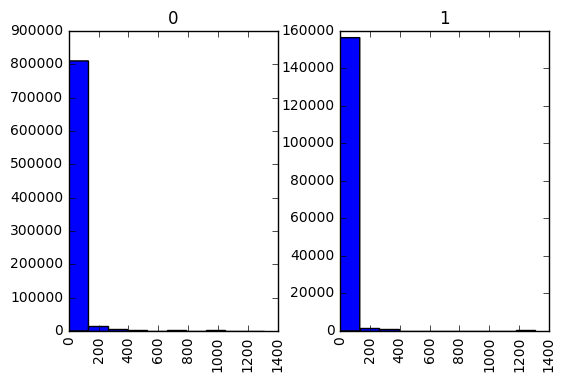

In [40]:
df['user_count'].hist(by=df['click'])

In [48]:
df['user_count'].groupby(df['click']).value_counts()

click  user_count
0      1             212917
       2             113468
       3              76444
       4              56289
       5              42680
       6              34538
       7              28232
       8              22790
       9              19035
       10             16272
       11             14258
       12             11964
       13             11207
       14              9743
       15              8154
       16              7563
       17              6933
       18              5793
       19              5391
       20              5264
       22              4635
       21              4372
       23              4207
       24              3743
       27              3442
       26              3149
       28              3092
       25              3047
       30              2627
       29              2585
                      ...  
1      353               18
       90                17
       106               17
       140               17
  

In [27]:
len(df['user'].unique())

420335

In [32]:
df['user_hash'] = df['user'].apply(hash) % 100

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a039550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1161b3d10>], dtype=object)

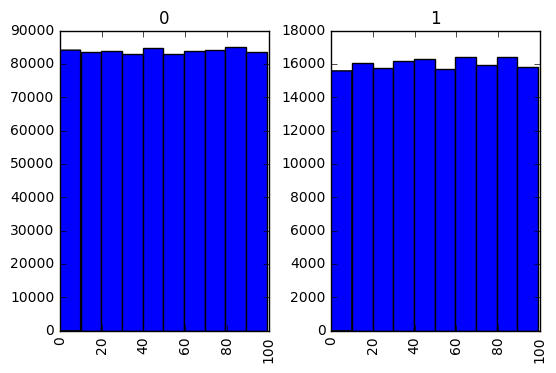

In [33]:
df['user_hash'].hist(by=df['click'])

In [34]:
df['click'].value_counts()

0    839780
1    160219
Name: click, dtype: int64

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,user_,user,catgs,ad_on_website,ad_on_app,timeofday,device_id_count,device_ip_count,user_hash,user_count
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,ddd2926e44956a24,ddd2926e44956a24,52,1,0,0,840265,2377,95,7
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,96809ac8711ee120,96809ac8711ee120,59,1,0,0,840265,7,20,7
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,b3cf8def8a4875bd,b3cf8def8a4875bd,59,1,0,0,840265,2,84,2
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,e8275b8f6332421a,e8275b8f6332421a,97,1,0,0,840265,3,91,2
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,9644d0bf779d90c2,9644d0bf779d90c2,345,1,0,0,840265,31,12,31


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11983c1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1195887d0>], dtype=object)

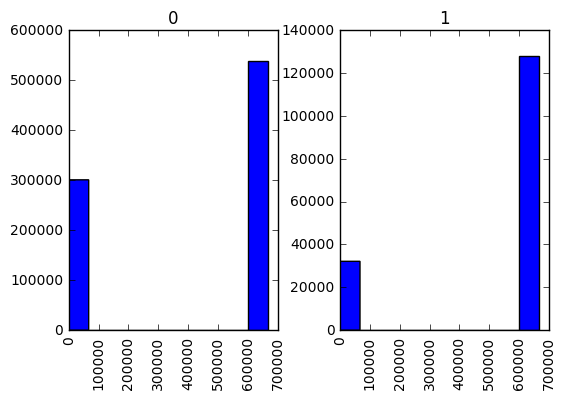

In [57]:
df['app_id_count'] = df.groupby(['app_id'])['app_id'].transform('count')
df['app_id_count'].hist(by=df['click'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119969450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11504bf10>], dtype=object)

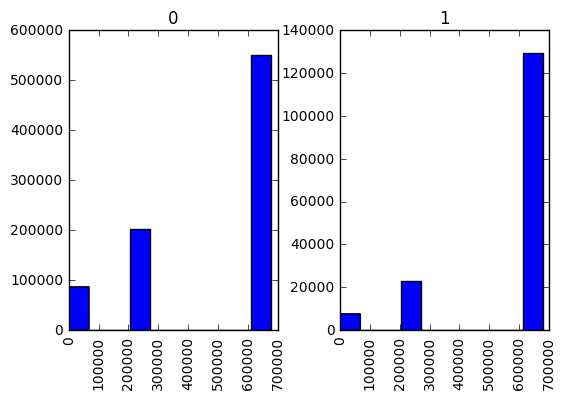

In [58]:
df['app_category_count'] = df.groupby(['app_category'])['app_category'].transform('count')
df['app_category_count'].hist(by=df['click'])

In [61]:
df['app_category_count'].groupby(df['click']).value_counts()

click  app_category_count
0      679869                550457
       225789                202622
       29806                  28027
       28765                  24662
       25259                  24125
       4302                    4086
       1436                    1421
       1410                    1300
       1108                    1032
       943                      889
       373                      342
       367                      292
       214                      204
       147                      137
       57                        49
       54                        45
       25                        25
       31                        25
       14                        14
       13                        12
       11                        11
       4                          2
       2                          1
1      679869                129412
       225789                 23167
       28765                   4103
       29806                   1779
  

In [62]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,catgs,ad_on_website,ad_on_app,timeofday,device_id_count,device_ip_count,user_hash,user_count,app_id_count,app_category_count
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,52,1,0,0,840265,2377,95,7,667107,679869
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,59,1,0,0,840265,7,20,7,667107,679869
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,59,1,0,0,840265,2,84,2,667107,679869
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,97,1,0,0,840265,3,91,2,667107,679869
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,345,1,0,0,840265,31,12,31,667107,679869


In [64]:
pd.set_option('display.max_rows', None)
df['app_id'].groupby(df['click']).value_counts()

click  app_id  
0      ecad2386    539039
       e2fcccd2     27904
       febd1138     23613
       54c5d545     11235
       9c13b419      8817
       39947756      8197
       5e3f096f      6892
       03528b27      6373
       2d869bee      5990
       3692fd30      5970
       51cedd4e      5181
       66f5e02e      5065
       f0d41ff1      4986
       e2a1ca37      4647
       396df801      4607
       1779deee      4591
       ffc6ffd0      4518
       0acbeaa3      4509
       3c4b944d      4482
       680e6a92      4022
       e96773f0      3975
       cfbd8210      3681
       45aff1a2      3654
       98fed791      3387
       c8e3e3c1      3149
       f888bf4c      3123
       73206397      2853
       53de0284      2792
       6fc85e22      2484
       7e7baafa      2399
       3f2a6cbb      2398
       d33d55c4      2189
       c868ee5b      1915
       e9739828      1818
       8b89048f      1800
       aa50890c      1712
       c7f29df3      1696
       33291962      1